# Supervised learning - Python - polynomial regression

In [1]:
%%latex

Simple linear regression
$$y = b_0 + b_1 * x_1 \\$$

Multiple linear regression
$$y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n \\$$

Polynomial linear regression (still linear because we are talking about the coeff, not x)
$$y = b_0 + b_1 * x_1 + b_2 * x_1^2 + ... + b_n * x_1^n \\$$

<IPython.core.display.Latex object>

In [2]:
import pandas as pd

dataset = pd.read_csv('data/position_salaries.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Position,Level,Salary
0,Senior Consultant,3,60000
1,Country Manager,5,110000
2,Business Analyst,1,45000
3,Region Manager,6,150000
4,Junior Consultant,2,50000


In [3]:
# we want a matrix for X and not a vector
X = dataset.iloc[:, 1:2].values
print('X: ', X)

y = dataset.iloc[:, 2].values
print('\ny: ', y)

# we have too few training examples, it does not make sense to split the dataset

X:  [[ 3]
 [ 5]
 [ 1]
 [ 6]
 [ 2]
 [ 8]
 [10]
 [ 4]
 [ 7]
 [ 9]]

y:  [  60000  110000   45000  150000   50000  300000 1000000   80000  200000
  500000]


In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X, y)

# x_0 has been added automatically
X_poly

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03]])

In [5]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

# fit a linear regression with polynomial features
linear_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

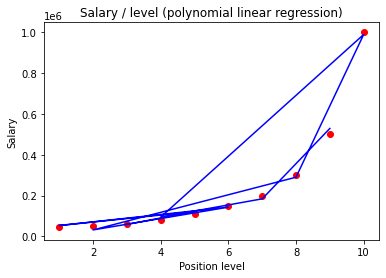

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# can be used to create more points to plot
#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='red')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Salary / level (polynomial linear regression)')

# we cannot use X_poly since it has already been fit 
plt.plot(X, linear_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

In [7]:
data = np.array([6.5])
linear_reg.predict(poly_reg.fit_transform(data.reshape(-1, 1)))

array([158862.45265153])